# Advanced pandas Practice - Nashville City Cemetery

In this exercise, you'll get to explore some additional features of the pandas library for cleaning and summarizing data. This will be done using the Nashville City Cemetery data.

As a reminder, you can get more information about the data that you were working with here: [Nashville City Cemetery Metadata](https://data.nashville.gov/api/views/diwx-fgj7/files/963c111e-2e2a-4133-a807-2becd590feb2?download=true&filename=Historic-Nashville-City-Cemetery-Interments-1846-1979-Metadata-v2.pdf).

1. Read the City Cemetery data into a pandas DataFrame. **Hint:** see the [`read_excel` function](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html).

2. **Most Common Causes of Death.**  
   a. Find the 10 most common (known) recorded causes of death.  
   b. Clean up some of the misspellings. Use the [`replace` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) to clean up some of the causes of death. For example, replace "Cholrea" with "Cholera" and "Still Born" with "Stillborn".   
   **Bonus (Save For Last):** One method of detecting and correcting misspellings is fuzzy matching using metrics like [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance). Check out [thefuzz](https://github.com/seatgeek/thefuzz) a library that implements fuzzy matching and apply it to detect and correct misspellings.  
   c. After correcting the spellings, find the 10 most common causes of death and create a bar chart to display your findings.  

3. Create a line chart showing the number of burials per year.

4. **Burials per Month and Year**  
    a. Use the [crosstab function](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) to build a summary table showing the number of burials per year per month. You should have one row per year and one column for month.  
    b. After creating this summary table, make sure that the year labels are integers (no decimal part) and that the columns are sorted correctly.  
    c. Filter your table to show only the years 1846 through 1860.  
    **Bonus** Display your table so that highlights any months that had over 100 burials. Hint: Look at styling in pandas: https://pandas.pydata.org/pandas-docs/version/1.0/user_guide/style.html  
    d. Go back to your original DataFrame and filter to the year and month that had the largest number of burials. What are the most common causes of death for that month?

5. **Burials per Decade**  
    a. Create a "Decade" column to show the decade in which a burial occurred.    
    b. Examine the burials per decade. Look at the total number of burials and the proportion (aka percentage) of male burials and female burials.  
    c. Create a clustered bar chart to show how male and female burials have changed over time.

### Bonus Questions

6. **Burials per Age Group**  
    a. Add a column to the original dataset to classify each row to one of the following categories (0-18, 19-25, 26-40, 41-64, and 65+). (Hint: One way to do this is using the [`cut` function](https://pandas.pydata.org/docs/reference/api/pandas.cut.html)).  
    b. Create a "Year Group" dividing the records up based on burial year. Use the following groups: Before 1880, 1880-1900, 1901-1920, After 1920.  
    c. Use a grouped bar chart to show how the proportion of burials per age group has changed over time. How would you describe the trends in terms of proportion of burials per age group over time?

7. **Last Names**  
    a. Create a new column titled Last Name. Extract the last name from the Name column by subsetting to all characters to the left of the comma. (Hint: See the pandas [string split function](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html). When you do this, make sure to consider cases where the name does not contain a comma.  
    b. What are the most common last names that appear?

8. The Civil War ended in April, 1865, with the last full year of fighting occurring in 1864.    
   a. Create a new DataFrame, burials_1864 by subsetting the full data to the rows for 1864 burials.  
   b. For any rows whose name contains the word "infant" (capitalized or lowercase), replace the "Age" value with 0.   
   c. Create a new column called age_category. If the individual was age 0 put "Infant". If the individual was not an infant but under age 18, put "Child". Everyone aged 18 and above should be listed as "Adult".  
   d.  Find the mean age for each age group.    
   e.  Find the last infant to be buried in 1864. Two ways this could be accomplished are sorting by both the month number and burial day or by creating a date column (for example, by using the [`to_datetime` function](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) and then sorting by this date column.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1 Read into data frame
df = pd.read_excel('F:\\d10\\Projects\\advanced-pandas-seanmalley1\\data\\cemdata.xlsx')


2. **Most Common Causes of Death.**  
   a. Find the 10 most common (known) recorded causes of death.  
   b. Clean up some of the misspellings. Use the [`replace` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) to clean up some of the causes of death. For example, replace "Cholrea" with "Cholera" and "Still Born" with "Stillborn".   
   **Bonus (Save For Last):** One method of detecting and correcting misspellings is fuzzy matching using metrics like [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance). Check out [thefuzz](https://github.com/seatgeek/thefuzz) a library that implements fuzzy matching and apply it to detect and correct misspellings.  
   c. After correcting the spellings, find the 10 most common causes of death and create a bar chart to display your findings. 

In [3]:
# 2a need to rename some columns
df.rename(columns={'Cause of Death/Burial': 'cause_death'}, inplace=True)
# getting a count for each cause_death

In [4]:
df.cause_death.value_counts()

cause_death
Consumption        1767
Unknown            1260
Still Born          841
Cholrea             667
Not Known           639
                   ... 
Fall from Horse       1
Tonsilitis            1
Diph Croup            1
Genl Dibility         1
Accidental fall       1
Name: count, Length: 2208, dtype: int64

In [5]:
#2a Answer selecting the top 10 causes of death and putting them in a new data frame
top10_cause_death = df['cause_death'].value_counts().nlargest(10)
print(top10_cause_death)

cause_death
Consumption     1767
Unknown         1260
Still Born       841
Cholrea          667
Not Known        639
Old Age          604
Cholera          575
Pneumonia        516
Flux             469
Complication     446
Name: count, dtype: int64


#2b:  b. Clean up some of the misspellings. Use the [`replace` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) to clean up some of the causes of death. For example, replace "Cholrea" with "Cholera" and "Still Born" with "Stillborn".   
   **Bonus (Save For Last):** One method of detecting and correcting misspellings is fuzzy matching using metrics like [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance). Check out [thefuzz](https://github.com/seatgeek/thefuzz) a library that implements fuzzy matching and apply it to detect and correct misspellings.

In [6]:
cause_counts = df['cause_death'].value_counts()
print(cause_counts)
# this only gives me head and tail. to show the full list, I will use
pd.set_option('display.max_rows', None)

cause_death
Consumption        1767
Unknown            1260
Still Born          841
Cholrea             667
Not Known           639
                   ... 
Fall from Horse       1
Tonsilitis            1
Diph Croup            1
Genl Dibility         1
Accidental fall       1
Name: count, Length: 2208, dtype: int64


In [7]:
#2b, fixing those spelling

fixed_spellings = {
    'Cholrea':'Cholera',
    'Not Known':'Unknown',
    'Teethin' :'Teething',
    'Feever':'Fever',
    'Complicated':'Complication',
    'Stil Born' :'Still Born',
    'Measels':'Measles',
    'Dropsey':'Dropsy',
    'Hooping Cough':'Whooping Cough',
    'Stillborn':'Still Born',
    'Diarrhaea':'Diarrhea',
    'Still Bornd':'Still Born'
}
df['cause_death'] = df['cause_death'].replace(fixed_spellings, regex=False)
print(top10_cause_death)

cause_death
Consumption     1767
Unknown         1260
Still Born       841
Cholrea          667
Not Known        639
Old Age          604
Cholera          575
Pneumonia        516
Flux             469
Complication     446
Name: count, dtype: int64


In [8]:
replacements = {
    'Cholrea': 'Cholera',
    'Not Known': 'Unknown',
    'Feever': 'Fever',
    'Complicated': 'Complication',
    'Stil Born': 'Still Born',
    'Measels': 'Measles',
    'Dropsey': 'Dropsy',
    'Hooping Cough': 'Whooping Cough',
    'Stillborn': 'Still Born',
    'Diarrhaea': 'Diarrhea',
    'Still Bornd': 'Still Born'
}
df['cause_death'] = df['cause_death'].replace(replacements)
print(top10_cause_death)


cause_death
Consumption     1767
Unknown         1260
Still Born       841
Cholrea          667
Not Known        639
Old Age          604
Cholera          575
Pneumonia        516
Flux             469
Complication     446
Name: count, dtype: int64


 c. After correcting the spellings, find the 10 most common causes of death and create a bar chart to display your findings.

<Axes: xlabel='cause_death'>

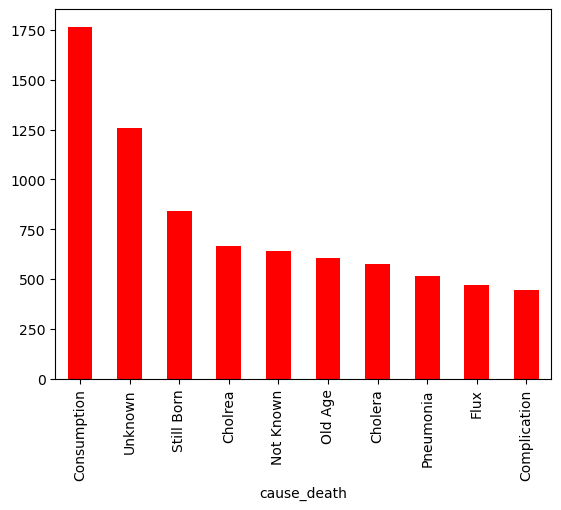

In [9]:
top10_cause_death.plot(kind='bar', color='red')

3. Create a line chart showing the number of burials per year.

Text(0, 0.5, 'Number of Burials')

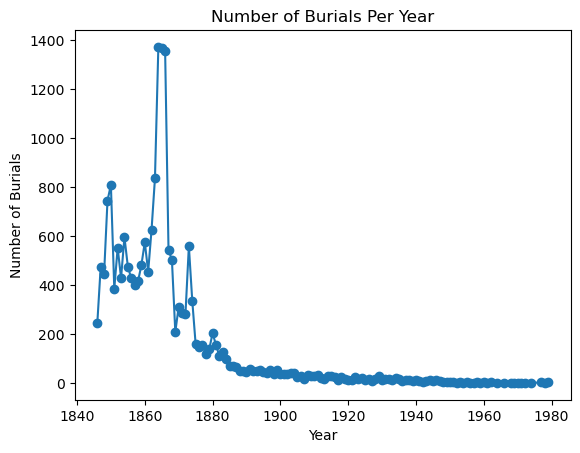

In [10]:
#df.head()
# group burials per year and make a dataframe for it
burials_per_year = df.groupby('Burial Year').size()
#Making the line graph
burials_per_year.plot(kind='line', marker='o')
plt.title('Number of Burials Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Burials')

4.. **Burials per Month and Year**  
    a. Use the [crosstab function](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) to build a summary table showing the number of burials per year per month. You should have one row per year and one column for month.  
    b. After creating this summary table, make sure that the year labels are integers (no decimal part) and that the columns are sorted correctly.  
    c. Filter your table to show only the years 1846 through 1860.  b

In [11]:
# 4A Crosstab
df['Burial Year'] = pd.to_numeric(df['Burial Year'], errors='coerce')
df['Burial Year'] = df['Burial Year'].fillna(0).astype(int)
df['Burial Year'] = df['Burial Year'].astype(int)
burial_summary_table = pd.crosstab(df['Burial Year'], df['Burial Month'])

print(burial_summary_table)


Burial Month  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
Burial Year                                                             
0               2    0    0    0    0    0    0    0    0    0    0    0
1846           22    0   30   26   20    0    0   25   26   23   39   35
1847           35   61   34   34   43   40   47   38   26   36   47   35
1848           37   39   27   36   36   65   47   49   41   21   26   23
1849           43   36   33   64   46   96  231   64   62   24   18   28
1850           29   52   31   26   24  370  120   43   37   28   27   22
1851           29   35   37   31   26   49   37   27   26   14   42   32
1852           37   54   36   32   37   76   84   39   58   36   32   31
1853           31   32   31   39   35   47   54   35   36   28   27   34
1854           43   44   30   33   35   95  137   34   61   25   25   34
1855           34   42   38   22   30   75   58   20   38   32   33   54
1856           33   37   28   34   29   51   42   3

In [12]:
filtered_year_1846_to_1860 = df[(df['Burial Year'] >= 1846) & (df['Burial Year'] <= 1860)]

burial_summary_table = pd.crosstab(filtered_year_1846_to_1860['Burial Year'], filtered_year_1846_to_1860['Burial Month'])

print(burial_summary_table)


Burial Month  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
Burial Year                                                             
1846           22    0   30   26   20    0    0   25   26   23   39   35
1847           35   61   34   34   43   40   47   38   26   36   47   35
1848           37   39   27   36   36   65   47   49   41   21   26   23
1849           43   36   33   64   46   96  231   64   62   24   18   28
1850           29   52   31   26   24  370  120   43   37   28   27   22
1851           29   35   37   31   26   49   37   27   26   14   42   32
1852           37   54   36   32   37   76   84   39   58   36   32   31
1853           31   32   31   39   35   47   54   35   36   28   27   34
1854           43   44   30   33   35   95  137   34   61   25   25   34
1855           34   42   38   22   30   75   58   20   38   32   33   54
1856           33   37   28   34   29   51   42   30   35   28   43   38
1857           34   35   34   34   31   36   37   3

#4D  Go back to your original DataFrame and filter to the year and month that had the largest number of burials. What are the most common causes of death for that month?

In [23]:
# Not sure how to extract the month numbers from the burial summary table, so I'm going to start from scratch
#count the number of entries by year and month
burials_year_by_month = df.groupby(['Burial Year', 'Burial Month']).size()
#get the maximum, which im hoping will be july, 1850 -- nevermind, july 1850 was only within the '46 to '60 from earlier.
max_burials_year_by_month = burials_year_by_month.idxmax()
print(max_burials_year_by_month)
#1866, Sep
# now find most common cause of death. 
# first I'm going to make a new dataframe for only this month 
# --- forgot, I think I need to make these integers. Not sure if this is why its not showing me anything
# ran into the same problem as earlier, need to account for NANs -- this worked.
df['Burial Year'] = df['Burial Year'].fillna(0).astype(int)
df['Month No.'] = df['Month No.'].fillna(0).astype(int)
df['Burial Year'] = df['Burial Year'].astype(int)
df['Month No.'] = df['Month No.'].astype(int)
Sep1866 = df[(df['Burial Year'] == 1866) & (df['Month No.'] == 9)]
#Sep1866.head()
# now to use the top10 causes of death code from above on this new dataframe
top10_cause_death_Sep1866 = Sep1866['cause_death'].value_counts().nlargest(10)
print(top10_cause_death_Sep1866)
#Top causes of death are unsuprising. Cholera really got em.

(1866, 'Sep')
cause_death
Cholera          327
Flux              11
Consumption       11
Unknown            9
Diarrhea           9
Teething           8
Old Age            6
Still Born         5
Typhoid Fever      4
Inf of Bowls       3
Name: count, dtype: int64


5. Burials per Decade
a. Create a "Decade" column to show the decade in which a burial occurred.
b. Examine the burials per decade. Look at the total number of burials and the proportion (aka percentage) of male burials and female burials.
c. Create a clustered bar chart to show how male and female burials have changed over time.